In [0]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

**Dataset Link** : https://www.kaggle.com/c/titanic/data

In [0]:
titanic_df = pd.read_csv('titanic-data.csv')

In [6]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')







1.   **Survived:** Outcome of survival (0 = No; 1 = Yes)
2.  ** Pclass:** Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
3.   **Name:** Name of passenger
4.  ** Sex: **Sex of the passenger
5.  ** Age:** Age of the passenger (Some entries contain NaN)
6.  **SibSp:** Number of siblings and spouses of the passenger aboard
7.  **Parch:** Number of parents and children of the passenger aboard
8.   **Ticket:** Ticket number of the passenger
9.   **Fare: **Fare paid by the passenger
10. **Cabin** Cabin number of the passenger (Some entries contain NaN)
11. **Embarked:** Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)









In [8]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


df.describe() method gives statistical information about numerical columns of the dataset

In [9]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## df.info tells us about column datatypes, non-null counts and memory consumption

# Three columns have missing values : Age, Cabin and Embarked

## Cabin Column

In [0]:
cabin_df = titanic_df['Cabin']

In [0]:
percentage_missing_cabin = (cabin_df.isnull().sum()/(len(titanic_df) * 1.0)) * 100

In [12]:
percentage_missing_cabin

77.10437710437711

### Over 77% values in this column are missing. It's better to drop this column altogether

In [13]:
titanic_df.drop(columns=['Cabin'], inplace=True)
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

# Embarked Column

In [0]:
embarked_df = titanic_df['Embarked']

In [15]:
embarked_df.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [16]:
embarked_df.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Majority of the passengers embarked from Southampton. Now since there are only 2 missing values, we can replace them with Southampton or 'S'

In [19]:
print(644.0/891)

0.7227833894500562


In [0]:
titanic_df['Embarked'].fillna('S', inplace=True)

# Age Column

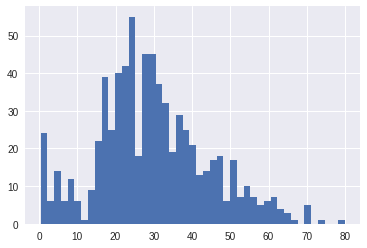

In [22]:
titanic_df['Age'].hist(bins=45)

In [0]:
age_df = titanic_df[['Age','Sex']]

In [24]:
age_df['Age'] = age_df.groupby('Sex').transform(lambda x: x.fillna(x.mean()))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab5fa963c8>]],
      dtype=object)

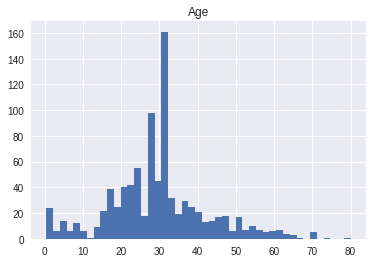

In [26]:
age_df.hist(bins=45)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab5f9977b8>]],
      dtype=object)

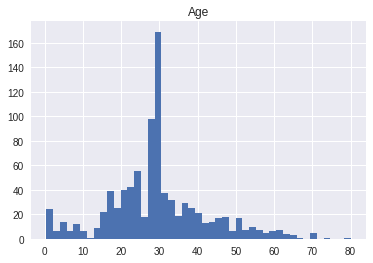

In [28]:
age_df = titanic_df[['Age','Sex']]
age_df['Age'] = age_df.groupby('Sex').transform(lambda x: x.fillna(x.median()))
age_df.hist(bins=45)

## Both of the above methods simply add unwanted patterns in the dataset, hence it is not a good idea to go ahead with them

#### We can use Machine Learning based algorithms for imputing missing values like kNN, etc., which might give us better results